#### Prof. M.e Davi Rocha

## Projeto - Prevendo Despesas Médicas usando Machine Learning

Neste notebook foi realizado as seguintes análises:

 - respostas a perguntas do cliente em relação ao conjunto de dados que foram respondidas através da análise exploratória e visualização de dados;
 - preparo do dataset para modelagem preditiva com objetivo de prever o custo de despesas médicas para uma amostra da população de pacientes de um hospital, considerando  as features hábito de fumar, idade, sexo, IMC e região. 
 - criação de dois modelos de previsão, regressão linear e random forest(floresta aleatória)



Dicionário de Dados:
    
- idade: idade do paciente

- sexo: sexo do paciente (feminino, masculino)

- IMC: índice de massa corporal, usando a razão entre altura e peso (idealmente 18,5 a 24,9)

- filhos: número de filhos do paciente

- fumante: se fuma ou não

- região: a área residencial do paciente.

- custo_medico_anual: custo médico anual do paciente em uma clínica medica (variável alvo)

O cliente deixou algumas perguntas:

1) Quais variáveis tem maior correlação com o custo_medico_anual?

2) Entre fumantes e não fumantes, qual grupo tem maior custo_medico_anual?

3) A proporção de fumantes por sexo é semelhante? 

4) À medida que a idade do paciente aumenta o que acontece com o custo_medico_anual? Há diferença entre fumantes e não fumantes?

In [61]:
# Imports
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
# Carregando o dataset
dataset = pd.read_csv('dados/custos_seguro.csv')

In [63]:
# Visualizando alguns registros
dataset.head() 

,idade,sexo,imc,filhos,fumante,regiao,custo_medico_anual
0,19,feminino,27.90,0,yes,sudeste,16884.92400
1,18,masculino,33.77,1,no,sul,1725.55230
2,28,masculino,33.00,3,no,sul,4449.46200
3,33,masculino,NaN,0,no,nordeste,21984.47061
4,32,masculino,28.88,0,no,nordeste,3866.85520


In [64]:
# Visualizando os tipos de dados
dataset.dtypes

idade                   int64
sexo                   object
imc                   float64
filhos                  int64
fumante                object
regiao                 object
custo_medico_anual    float64
dtype: object

In [65]:
# Visualizando o total de linhas por coluna
dataset.count()

idade                 1338
sexo                  1338
imc                   1325
filhos                1338
fumante               1338
regiao                1338
custo_medico_anual    1338
dtype: int64

In [66]:
# Verifique se há valores ausentes
missing_values = dataset.isnull().sum().sort_values(ascending = False)
missing_values

imc                   13
idade                  0
sexo                   0
filhos                 0
fumante                0
regiao                 0
custo_medico_anual     0
dtype: int64

In [67]:
# Checando percentual de valores missing
missing_values = missing_values[missing_values > 0]/dataset.shape[0] 
print(f'{missing_values * 100} %')

imc    0.971599
dtype: float64 %


In [68]:
# Função para o substituir valores nulos
def impute_media(df):
    return df.fillna(df.mean())

In [69]:
# Removendo valores missing
dataset.imc = dataset['imc'].transform(impute_media)

In [70]:
# Verifique se há valores ausentes
missing_values = dataset.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]/dataset.shape[0] 
print(f'{missing_values *100} %')

Series([], dtype: float64) %


In [71]:
# Convertendo todas as variáveis para o tipo inteiro a fim de calcular as correlações
from sklearn.preprocessing import LabelEncoder

dataset_transformado = dataset.apply(LabelEncoder().fit_transform)

In [72]:
# Visualizando os tipos de dados
dataset_transformado.dtypes

idade                 int64
sexo                  int32
imc                   int64
filhos                int64
fumante               int32
regiao                int32
custo_medico_anual    int64
dtype: object

In [73]:
dataset_transformado.head()

,idade,sexo,imc,filhos,fumante,regiao,custo_medico_anual
0,1,0,197,0,1,2,1005
1,0,1,351,1,0,3,57
2,10,1,332,3,0,3,306
3,15,1,272,0,0,0,1097
4,14,1,223,0,0,0,254


## Quais variáveis tem maior correlação com o custo_medico_anual?

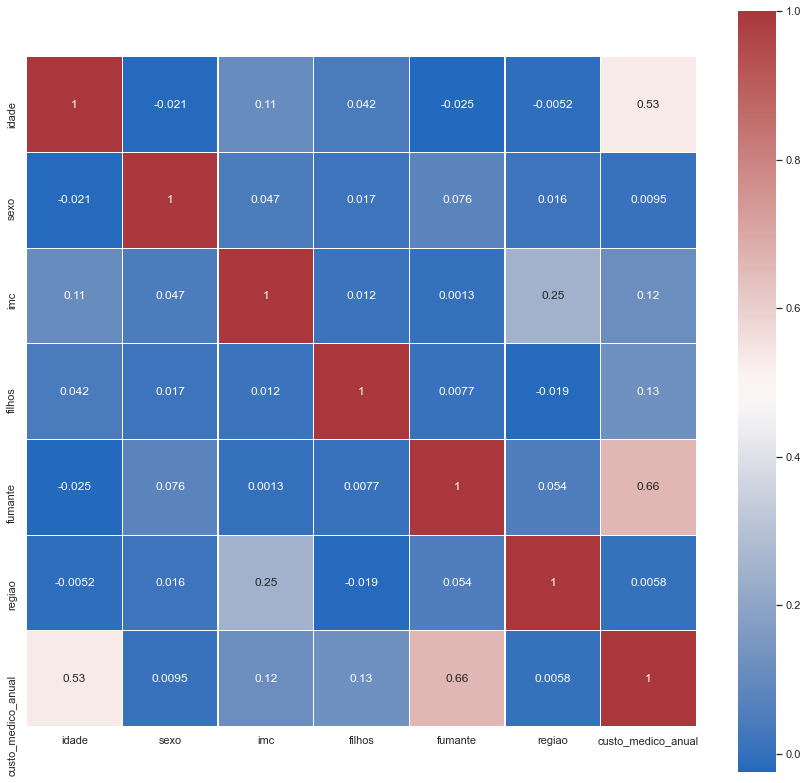

In [74]:
# Solução com Seaborn

# Definindo propriedades do Seaborn
sns.set(color_codes = True)

# Definindo área de platagem
plt.figure(figsize = (15, 14))

# Criando o heatmap
sns.heatmap(dataset_transformado.astype(float).corr(), 
            linewidths = 0.1, 
            square = True, 
            linecolor = 'white', 
            annot = True,
            cmap = "vlag")
plt.show()

De acordo com o heatmap acima temos que as features: *fumante* e *idade* são as que mais tem correlação positiva com o custo médico anual.

## Entre fumantes e não fumantes, qual grupo tem maior custo_medico_anual?

Forma 1: Distribuição dos custos nos dois grupos, fumantes e não fumantes

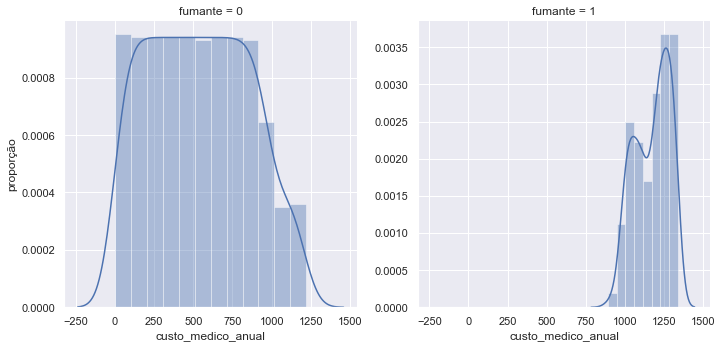

In [75]:
# Solução com Seaborn
grafico = sns.FacetGrid(dataset_transformado, col = "fumante", height = 5, sharey = False, sharex = True)
grafico.map(sns.distplot, "custo_medico_anual", color = 'b');
grafico.set_axis_labels("custo_medico_anual", "proporção");

Em não fumantes o custo medico é aproximadamente linear

Em fumantes o custo mantem-se entre 1000 e 1250 na maioria das observações
Podemos concluir que o custo médico é maior em fumantes

Forma 2: Com boxplot


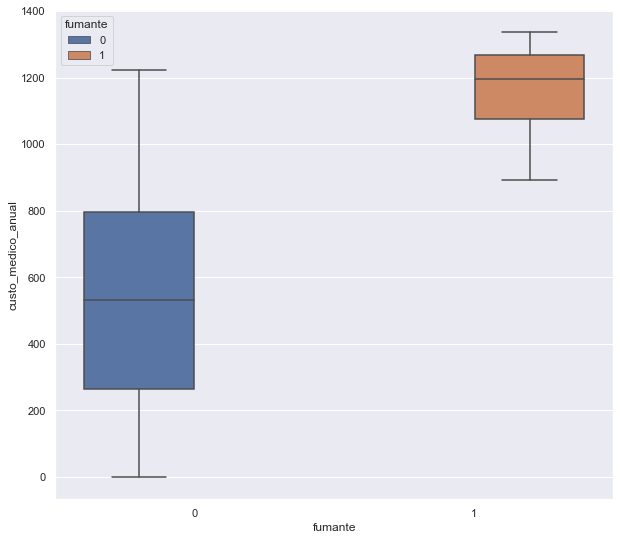

In [76]:
# Definindo área de platagem
plt.figure(figsize = (10, 9))

sns.boxplot( x = 'fumante', y = 'custo_medico_anual', hue='fumante', data = dataset_transformado);

O boxplot evidencia ainda mais que o custo medico etre fumantes mante-se maiores para fumantes

Distribuição do dados por idade:

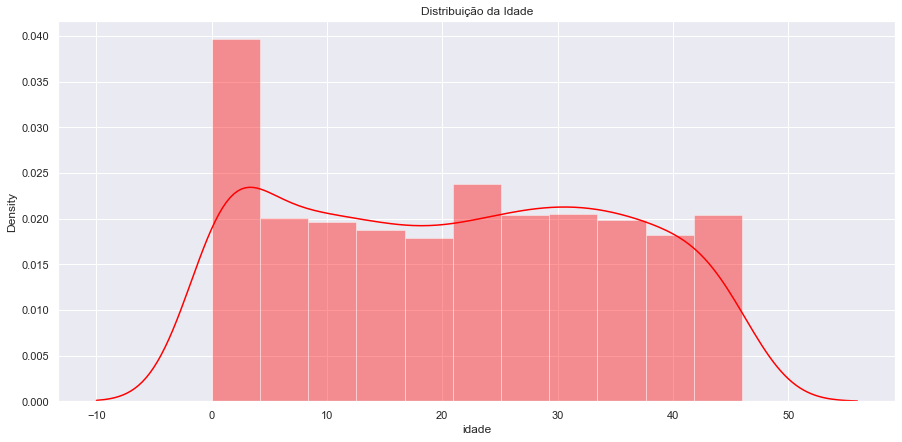

In [77]:

plt.figure(figsize = (15,7))
plt.title("Distribuição da Idade")
ax = sns.distplot(dataset_transformado["idade"], color = 'red')

## A proporção de fumantes por sexo é semelhante ou precisamos balancear esses dados?

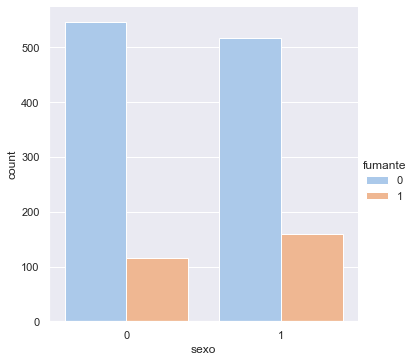

In [78]:
#Usando gráfic de barra


sns.catplot(x= 'sexo', data =dataset_transformado, kind= 'count', hue = 'fumante', palette='pastel');

As proporções de fumantes tanto no sexo feminino quanto no masculino representados pela barra laranja são semelhantes.
Logo não há necessidade de balancear os dados.

## À medida que a idade do paciente aumenta o que acontece com o custo_medico_anual? Há diferença entre fumantes e não fumantes?

Vamos usar um gráfico de dispersao e uma regressão linear para auxiliar na resposta:

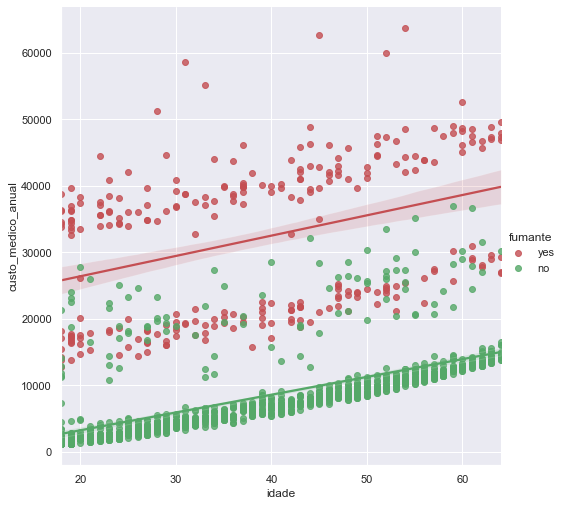

In [79]:

sns.lmplot(x = "idade", y = "custo_medico_anual", hue = "fumante", data = dataset, palette = dict(yes = "r", no = "g"), height = 7)
plt.show()


Conforme a idade aumenta percebemos que o custo médico anual aumenta tanto para fumantes e não fumantes.
Obseve também que em todas as idades o custo médico anual em geral é maior para os fumantes.

## Construção do Modelo Preditivo

### Preparação dos Dados

A  variável target é um valor numérico (custo_medico_anual) 

Será utilizado a regressão linear para a construção do modelo. 


In [80]:
# Visualização das primeiras linahs do dataset
dataset.head()

,idade,sexo,imc,filhos,fumante,regiao,custo_medico_anual
0,19,feminino,27.900000,0,yes,sudeste,16884.92400
1,18,masculino,33.770000,1,no,sul,1725.55230
2,28,masculino,33.000000,3,no,sul,4449.46200
3,33,masculino,30.693019,0,no,nordeste,21984.47061
4,32,masculino,28.880000,0,no,nordeste,3866.85520


In [81]:
# Conversão de variáveis categóricas em variáveis numéricas (dummy) e visualizar o resultado
dataset = pd.get_dummies(dataset)
dataset.head()

,idade,imc,filhos,custo_medico_anual,sexo_feminino,sexo_masculino,fumante_no,fumante_yes,regiao_nordeste,regiao_norte,regiao_sudeste,regiao_sul
0,19,27.900000,0,16884.92400,1,0,0,1,0,0,1,0
1,18,33.770000,1,1725.55230,0,1,1,0,0,0,0,1
2,28,33.000000,3,4449.46200,0,1,1,0,0,0,0,1
3,33,30.693019,0,21984.47061,0,1,1,0,1,0,0,0
4,32,28.880000,0,3866.85520,0,1,1,0,1,0,0,0


In [82]:
# Separação das features e do target:
X = dataset.drop(columns = ['custo_medico_anual'])
y = dataset['custo_medico_anual']

In [85]:
# Divisão dos dados em treino e teste

# Importa a função
from sklearn.model_selection import train_test_split

# Aplica a função com 10% dos dados para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

#dados de treino para treinar o algoritmo e construir o modelo
#dados de teste para avaliar a performance do modelo ja treinado

#### Primeira versão do modelo: Regressão Linear


In [86]:
# Cria a primeira versão do modelo de regressão linear

# Imports
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Cria o modelo e treina com os dados de teste
lr = LinearRegression().fit(X_train, y_train)

# Previsões nos dados de treino
lr_train_pred = lr.predict(X_train)

# Previsões nos dados de teste
lr_test_pred = lr.predict(X_test)

# Calcula as métricas
lr_train_mse = mean_squared_error(y_train, lr_train_pred)
lr_test_mse = mean_squared_error(y_test, lr_test_pred)

# Imprime o MSE (Mean Squared Error)
print(f'MSE nos dados de treino: {lr_train_mse:.9}, MSE nos dados de teste: {lr_test_mse:.9}')
# Imprime o RMSE (Root Mean Squared Error)
print(f'RMSE nos dados de treino: {np.sqrt(np.absolute(lr_train_mse)):.5}, RMSE nos dados de teste: {np.sqrt(np.absolute(lr_train_mse)):.5}') 

  
# Coeficiente R2
print(f'R2 nos dados de treino: {r2_score(y_train, lr_train_pred):.5}, R2 nos dados de teste: {r2_score(y_test, lr_test_pred):.5}')

MSE nos dados de treino: 36914811.6, MSE nos dados de teste: 32603637.3
RMSE nos dados de treino: 6075.8, RMSE nos dados de teste: 6075.8
R2 nos dados de treino: 0.74968, R2 nos dados de teste: 0.76367


Previsão consistente tanto nos dados de treino como nos dados de teste(dados não vistos pelo modelo).

Segunda versão do modelo: Random Forest

In [88]:
# Testando outro algoritmo (Método Ensemble)

# Import
from sklearn.ensemble import RandomForestRegressor

# Cria e treina o modelo com 50 arvores
rfr = RandomForestRegressor(n_estimators = 50).fit(X_train, y_train)

# Previsões em treino e teste
rfr_train_pred = rfr.predict(X_train)
rfr_test_pred = rfr.predict(X_test)

# Calcula as métricas em treino e meste
rfr_train_mse = mean_squared_error(y_train,rfr_train_pred)
rfr_test_mse = mean_squared_error(y_test,rfr_test_pred)

# Imprime o MSE (Mean Squared Error)
print('MSE nos dados de treino: {:.9}, MSE nos dados de teste: {:.9}'.format(rfr_train_mse, rfr_test_mse))

# Imprime o RMSE (Root Mean Squared Error)
print('RMSE nos dados de treino: {:.5}, RMSE nos dados de teste: {:.5}'.format(
    np.sqrt(np.absolute(rfr_train_mse)), 
    np.sqrt(np.absolute(rfr_train_mse))))
    
# Coeficiente R2
print('R2 nos dados de treino: {:.5}, R2 nos dados de teste: {:.5}'.format(
    r2_score(y_train, rfr_train_pred),
    r2_score(y_test, rfr_test_pred)))

MSE nos dados de treino: 3659800.4, MSE nos dados de teste: 24710433.2
RMSE nos dados de treino: 1913.1, RMSE nos dados de teste: 1913.1
R2 nos dados de treino: 0.97518, R2 nos dados de teste: 0.82088


Esta é uma previsão muito boa, o RandomForest apresenta um melhor resultado com uma pontuação R2 de 97% nos dados de treinamento e 82% nos dados de teste(novos dados). Ele também tem o menor valor RMSE.

##### Keep calm and analysing data!